In [1]:
import pandas as pd
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_pickle('final_data.pkl')
del(data['index'])

In [2]:
data.columns

Index(['FileName', 'X', 'Y', 'Pressure', 'Azumith', 'PenElevation', 'user',
       'sample', 'label', 'x_len', 'y_len', 'avg_ps', 'ratio', 'dif_pen',
       'dif_az', 'pen_up', 'sign_time', 'x_speed', 'y_speed', 'x_size',
       'dist_list', 'total_length'],
      dtype='object')

In [3]:
x = max(df.x_size)
print(x)
max_size = df.loc[df.x_size == x]
max_size

1000


,FileName,X,Y,Pressure,Azumith,PenElevation,user,sample,label,x_len,...,ratio,dif_pen,dif_az,pen_up,sign_time,x_speed,y_speed,x_size,dist_list,total_length
2243,0098f21.fpg,"[17.297149122807017, 17.132675438596493, 16.99...","[39.58151700087184, 42.37140366172624, 43.7663...","[30.0, 67.0, 83.0, 91.0, 127.0, 149.0, 185.0, ...","[163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....",0098,21,0,3648.0,...,3.180471,9,24,478,10.0,3.648,1.147,1000,"[2.794730608343333, 1.401660701965755, 1.39494...",1264.317252


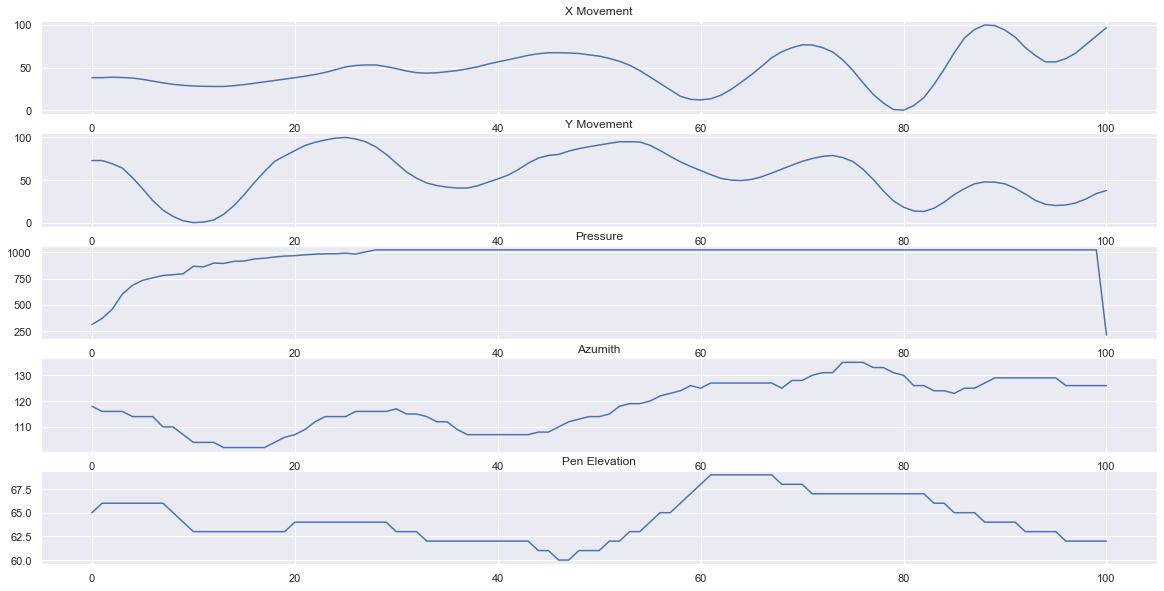

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(5,1,1)
plt.plot(data.X[0])
plt.title('X Movement')
#plt.show()
plt.subplot(5,1,2)
plt.plot(data.Y[0])
plt.title('Y Movement')
#plt.show()
plt.subplot(5,1,3)
plt.plot(data.Pressure[0])
plt.title('Pressure')
#plt.show()
plt.subplot(5,1,4)
plt.plot(data.Azumith[0])
plt.title('Azumith')
#plt.show()
plt.subplot(5,1,5)
plt.plot(data.PenElevation[0])
plt.title('Pen Elevation')
plt.savefig('.\plots_and_graphs\data_representation.png', dpi=300, bbox_inches='tight')
plt.show()




# RDP
maximum size of sign is 1000 and the index of the sign is <h3><b>2243</b></h3> <br>
Applying RDP on the sign with 1000 data points to get the minimum points required for each sign


In [4]:
#imports
import rdp
from rdp import rdp
sns.set()

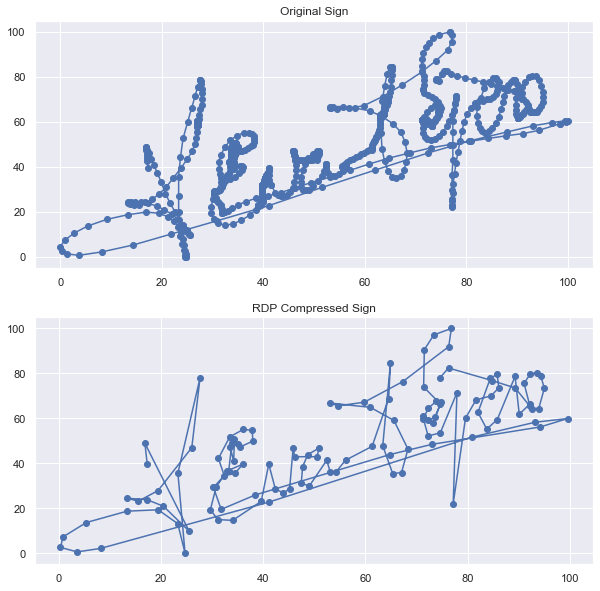

122


In [5]:
#i = 9
#plt.plot(df.X[i],df.Y[i])
def rdpp(x,y,e=1):
    l =zip(x,y)
    l=np.array(list(l))
    #change epsilon for more/less points.
    sc = rdp(l,epsilon = e)
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,1,2)
    plt.plot(sc[:,0],sc[:,1],'o-')
    plt.title('RDP Compressed Sign')    
    
    plt.subplot(2,1,1)
    plt.plot(x,y,'o-')
    plt.title('Original Sign')    
    #plt.savefig('.\plots_and_graphs\RDP_Compression_v2.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(len(sc))
rdpp(data.X[2243],data.Y[2243])

In [6]:
def rdpp(x,y,e=1):
    l =zip(x,y)
    l=np.array(list(l))
    #change epsilon for more/less points.
    sc = rdp(l,epsilon = e)
    return sc[:,0],sc[:,1]

#nx,ny = rdpp(data.X[2243],data.Y[2243])
#print(len(nx),nx)
new_x = []
new_y = []
for i in range(4768):
    x = data.X[i]
    y = data.Y[i]
    nx,ny = rdpp(x,y)
    new_x.append(nx)
    new_y.append(ny)
    print(i)
print(len(new_x),len(new_y))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [33]:
data['rdp_x'] = new_x
data['rdp_y'] = new_y
#data.head()
#plt.figure(figsize=(10,11))
#plt.subplot(311)
#plt.plot(data.X[1],data.Y[1])
#plt.title('Original Sign')
#plt.subplot(312)
#plt.plot(data.rdp_x[1],data.rdp_y[1])
#plt.title('RDP Compressed Sign')
#plt.subplot(313)
#plt.plot(dahttps://www.dataschool.io/15-hours-of-expert-machine-learning-videos/ta.new_x[1],data.new_y[1])
#plt.title('100 point Sign')
#plt.savefig('.\plots_and_graphs\Compression_of_sign.png', dpi=300, bbox_inches='tight')
#plt.show()
#plt.plot(data.X[1],data.Y[1])
#plt.plot(data.new_x[1],data.new_y[1])
#plt.legend(['original','final compressed'])
#plt.savefig('.\plots_and_graphs\original_vs_Compressed.png', dpi=300, bbox_inches='tight')
#plt.show()

ValueError: Length of values does not match length of index

taking 100 points. so each sign should be 100x100

# Equidistant
100 points.

In [13]:
from scipy.interpolate import interp1d
#from scipy.interpolate import interp2d

In [14]:
# Linear length on the line
new_x = []
new_y = []
for i in range(4768):
    x = data.rdp_x[i]
    y = data.rdp_y[i]
    length = len(x)
    distance = np.cumsum(np.sqrt( np.ediff1d(x, to_begin=0)**2 + np.ediff1d(y, to_begin=0)**2 ))

    distance = distance/distance[-1]
    #print(distance)
    fx, fy = interp1d( distance, x ), interp1d( distance, y )

    alpha = np.linspace(0, 1,100)
    x_regular, y_regular = fx(alpha), fy(alpha)
    new_x.append(x_regular)
    new_y.append(y_regular)
    if(i%100 == 0):
        print('done',i)


#plt.plot(x, y )
#plt.plot(x_regular, y_regular)
#plt.axis('equal')
#plt.show()

done 0
done 100
done 200
done 300
done 400
done 500
done 600
done 700
done 800
done 900
done 1000
done 1100
done 1200
done 1300
done 1400
done 1500
done 1600
done 1700
done 1800
done 1900
done 2000
done 2100
done 2200
done 2300
done 2400
done 2500
done 2600
done 2700
done 2800
done 2900
done 3000
done 3100
done 3200
done 3300
done 3400
done 3500
done 3600
done 3700
done 3800
done 3900
done 4000
done 4100
done 4200
done 4300
done 4400
done 4500
done 4600
done 4700


In [35]:
data2['new_x']=new_x
data2['new_y']=new_y

In [92]:
df = data.copy()
def rspi(signal, input_fs, output_fs):

    scale = output_fs / input_fs
    # calculate new length of sample
    n = round(len(signal) * scale)

    # use linear interpolation
    # endpoint keyword means than linspace doesn't go all the way to 1.0
    # If it did, there are some off-by-one errors
    # e.g. scale=2.0, [1,2,3] should go to [1,1.5,2,2.5,3,3]
    # but with endpoint=True, we get [1,1.4,1.8,2.2,2.6,3]
    # Both are OK, but since resampling will often involve
    # exact ratios (i.e. for 44100 to 22050 or vice versa)
    # using endpoint=False gets less noise in the resampled sound
    resampled_signal = np.interp(
        np.linspace(0.0, 1.0, n, endpoint=False),  # where to interpret
        np.linspace(0.0, 1.0, len(signal), endpoint=False),  # known positions
        signal,  # known data points
    )
    return resampled_signal

prs = []
azi = []
pe = []
for i in range(4768):
    ps=rspi(df.Pressure[i], len(df.Pressure[i]), 100)
    az=rspi(df.Azumith[i], len(df.Azumith[i]), 100)
    el=rspi(df.PenElevation[i], len(df.PenElevation[i]), 100)
    prs.append(ps)
    azi.append(az)
    pe.append(el)
    if(i%500==0):
        print(i,'done')

df['new_pressure'] = prs
df['new_azi'] = azi
df['new_pen_el'] = pe

for i in range(100):
    x1 =[]
    y1 =[]
    p1 =[]
    a1 =[]
    e1 =[]
    for j in range(4768):
        x1.append(df.new_x[j][i])
        y1.append(df.new_y[j][i])
        p1.append(df.new_pressure[j][i])
        a1.append(df.new_azi[j][i])
        e1.append(df.new_pen_el[j][i])
    df['tx'+str(i)] = x1
    df['ty'+str(i)] = y1
    df['tp'+str(i)] = p1
    df['ta'+str(i)] = a1
    df['te'+str(i)] = e1

df.head()

print(len(prs),len(azi),len(pe))
df.head()

0 done
500 done
1000 done
1500 done
2000 done
2500 done
3000 done
3500 done
4000 done
4500 done
4768 4768 4768


,FileName,X,Y,Pressure,Azumith,PenElevation,user,sample,label,x_len,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0000f00.fpg,"[38.16971713810316, 38.16971713810316, 38.6688...","[72.88776796973518, 72.88776796973518, 69.1046...","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66....",0,00,0,3005.0,...,89.606514,35.060504,1023.0,126.00,62.00,96.805324,37.704918,219.12,126.00,62.00
1,0000f01.fpg,"[33.56973995271868, 34.160756501182036, 34.160...","[73.78004369992716, 77.4217042971595, 78.44136...","[101.0, 176.0, 294.0, 423.0, 543.0, 620.0, 663...","[111.0, 111.0, 111.0, 109.0, 109.0, 109.0, 109...","[61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62....",0,01,0,2538.0,...,91.829454,23.172350,1023.0,107.00,64.00,100.000000,19.446468,837.87,106.01,63.01
2,0000f02.fpg,"[26.433915211970078, 26.733167082294262, 26.73...","[71.64078325455773, 74.61174881836597, 74.6117...","[146.0, 270.0, 396.0, 501.0, 589.0, 628.0, 640...","[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 106...","[63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62....",0,02,0,2005.0,...,86.191531,5.276292,1023.0,105.00,64.00,92.817955,4.523970,1023.00,103.26,64.87
3,0000f03.fpg,"[34.932126696832576, 34.932126696832576, 34.93...","[59.693165969316595, 59.693165969316595, 59.69...","[139.0, 233.0, 311.0, 386.0, 463.0, 492.0, 504...","[110.0, 110.0, 113.0, 113.0, 113.0, 113.0, 113...","[66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66....",0,03,0,2210.0,...,63.901283,12.791157,1023.0,108.78,67.22,72.986425,17.015342,416.02,109.89,67.89
4,0000f04.fpg,"[26.12359550561798, 26.45131086142322, 26.7790...","[61.60653505786249, 64.94213750850919, 65.2825...","[44.0, 120.0, 207.0, 312.0, 351.0, 394.0, 430....","[125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124...","[59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60....",0,04,0,2136.0,...,69.078897,4.767368,1023.0,129.08,66.00,78.370787,9.870660,968.98,128.00,67.46


In [97]:
"""del(df['X'])
del(df['Y'])
del(df['Pressure'])
del(df['Azumith'])
del(df['PenElevation'])
del(df['rdp_x'])
del(df['rdp_y'])"""
#df['user'] = df['user'].apply(pd.to_numeric) 
df.to_csv('clean_data_v2.csv')
df.to_pickle("clean_data_v2.pkl")

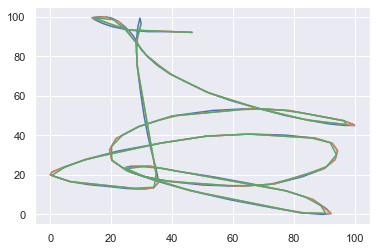

In [64]:
plt.plot(data.X[223],data.Y[223])
plt.plot(data.rdp_x[223],data.rdp_y[223])
#plt.show()
plt.plot(data.new_x[223],data.new_y[223])
plt.show()

1000


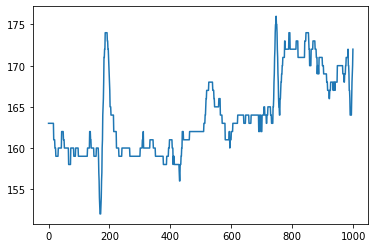

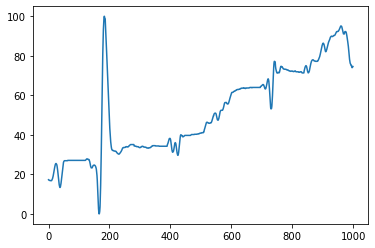

In [5]:
plt.plot(df.Azumith[2243])#,df.new_y[0])
print(len(df.X[2243]))

plt.show()
plt.plot(df.X[2243])#,df.Y[0])

In [89]:
#data = df[['new_x','new_y','ratio','avg_ps','user','label']]
data['user'] = data['user'].apply(pd.to_numeric) 
#data1 = data.loc[data.label == 1]
#data1.head()
data.head()

,FileName,X,Y,Pressure,Azumith,PenElevation,user,sample,label,x_len,...,sign_time,x_speed,y_speed,x_size,dist_list,total_length,rdp_x,rdp_y,new_x,new_y
0,0000f00.fpg,"[38.16971713810316, 38.16971713810316, 38.6688...","[72.88776796973518, 72.88776796973518, 69.1046...","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66....",0,00,0,3005.0,...,1.01,29.752475,15.702970,101,"[0.0, 3.815891845360075, 5.055101540503492, 11...",760.806104,"[38.16971713810316, 36.17304492512479, 28.3860...","[72.88776796973518, 39.78562421185372, 0.0, 9....","[38.16971713810316, 37.70796488880348, 37.2462...","[72.88776796973518, 65.2325358101996, 57.57730..."
1,0000f01.fpg,"[33.56973995271868, 34.160756501182036, 34.160...","[73.78004369992716, 77.4217042971595, 78.44136...","[101.0, 176.0, 294.0, 423.0, 543.0, 620.0, 663...","[111.0, 111.0, 111.0, 109.0, 109.0, 109.0, 109...","[61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62....",0,01,0,2538.0,...,1.01,25.128713,13.594059,101,"[3.6893078573076656, 1.0196649672250686, 0.414...",909.767932,"[33.56973995271868, 33.29393223010244, 28.5657...","[73.78004369992716, 48.4340859431901, 11.58048...","[33.56973995271868, 33.47107770416542, 33.3724...","[73.78004369992716, 64.71325920131022, 55.6464..."
2,0000f02.fpg,"[26.433915211970078, 26.733167082294262, 26.73...","[71.64078325455773, 74.61174881836597, 74.6117...","[146.0, 270.0, 396.0, 501.0, 589.0, 628.0, 640...","[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 106...","[63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62....",0,02,0,2005.0,...,1.13,17.743363,13.106195,113,"[2.9859986710022004, 0.0, 2.5658338960162013, ...",1034.401155,"[26.433915211970078, 24.33915211970075, 18.902...","[71.64078325455773, 41.86360567184335, 11.8838...","[26.433915211970078, 25.706276308448782, 24.97...","[71.64078325455773, 61.29735447914783, 50.9539..."
3,0000f03.fpg,"[34.932126696832576, 34.932126696832576, 34.93...","[59.693165969316595, 59.693165969316595, 59.69...","[139.0, 233.0, 311.0, 386.0, 463.0, 492.0, 504...","[110.0, 110.0, 113.0, 113.0, 113.0, 113.0, 113...","[66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66....",0,03,0,2210.0,...,1.11,19.909910,12.918919,111,"[0.0, 0.0, 3.142513447358337, 5.24714781509590...",992.920435,"[34.932126696832576, 35.61085972850679, 31.266...","[59.693165969316595, 56.62482566248257, 31.171...","[34.932126696832576, 34.454007788535854, 32.76...","[59.693165969316595, 49.846186240574504, 39.96..."
4,0000f04.fpg,"[26.12359550561798, 26.45131086142322, 26.7790...","[61.60653505786249, 64.94213750850919, 65.2825...","[44.0, 120.0, 207.0, 312.0, 351.0, 394.0, 430....","[125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124...","[59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60....",0,04,0,2136.0,...,1.27,16.818898,11.566929,127,"[3.3516624327624123, 0.4724906935817357, 0.0, ...",1058.531682,"[26.12359550561798, 21.722846441947567, 12.265...","[61.60653505786249, 29.20353982300885, 0.0, 10...","[26.12359550561798, 24.696928691927383, 23.270...","[61.60653505786249, 51.101896575434694, 40.597..."


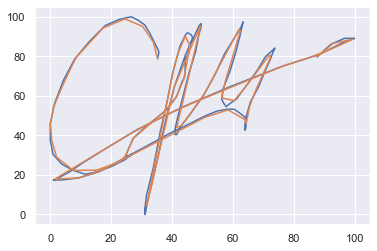

In [66]:
plt.plot(data.X[100],data.Y[100])
plt.plot(data.new_x[100],data.new_y[100])
plt.show()

In [8]:
testing = df[['new_x','new_y','avg_ps','ratio','pen_up','sign_time','label','user']]
for i in range(100):
    x1 =[]
    y1 =[]
    for j in range(4768):
        x1.append(df.new_x[j][i])
        y1.append(df.new_y[j][i])
    testing['tx'+str(i)] = x1
    testing['ty'+str(i)] = y1
del(testing['new_x'])
del(testing['new_y'])
testing['user'] = testing['user'].apply(pd.to_numeric) 
testing = testing.loc[testing.label ==1]
#target = testing.pop('user')
testing.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,avg_ps,ratio,pen_up,sign_time,label,user,tx0,ty0,tx1,ty1,...,tx95,ty95,tx96,ty96,tx97,ty97,tx98,ty98,tx99,ty99
2272,697.582524,1.914188,0,1.03,1,0,41.362821,71.453089,44.930596,79.345738,...,23.214132,20.062350,16.386523,14.732560,9.579056,9.377432,2.872434,3.897636,4.423192,0.000000
2273,696.436893,2.083710,0,1.03,1,0,41.503800,73.076923,45.561458,81.918737,...,22.377413,26.809447,14.814925,20.690003,7.384805,14.410227,1.169456,7.027230,6.026059,8.993213
2274,681.326733,2.260325,0,1.01,1,0,41.583610,84.480601,41.074646,82.452683,...,23.280630,23.884735,16.392023,17.359406,10.163095,10.127554,3.056793,3.799235,4.401993,1.001252
2275,719.407767,1.804837,0,1.03,1,0,29.354939,76.434196,34.953320,84.908904,...,27.717854,23.529879,18.943467,18.156404,10.362187,12.507015,2.258828,6.162213,6.201309,7.311586
2276,658.116505,2.169557,0,1.03,1,0,31.231498,74.181118,36.249649,83.131922,...,27.008936,25.736094,20.897780,17.446156,14.786624,9.156217,7.486743,1.908099,2.042629,0.000000


In [9]:
x_train,x_test,y_train,y_test = train_test_split(testing ,testing['user'] ,test_size = 0.3,random_state = 4)

In [10]:
del(x_train['user'])
del(x_test['user'])

In [44]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(205,input_shape = (1,205),activation = 'relu'),
                            tf.keras.layers.Dense(75,activation = 'relu'),
                            tf.keras.layers.Dense(100,activation = 'softmax')
                            ])

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1, 205)            42230     
_________________________________________________________________
dense_19 (Dense)             (None, 1, 75)             15450     
_________________________________________________________________
dense_20 (Dense)             (None, 1, 100)            7600      
Total params: 65,280
Trainable params: 65,280
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
dataset = tf.data.Dataset.from_tensor_slices((testing.values, target.values))


In [8]:
print(dataset)

<DatasetV1Adapter shapes: ((205,), ()), types: (tf.float64, tf.int64)>


In [48]:
train_dataset = dataset.shuffle(len(df)).batch(5)


In [40]:
train_dataset

<DatasetV1Adapter shapes: ((?, 205), (?,)), types: (tf.float64, tf.int64)>

In [49]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(175, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(100,activation = 'softmax')
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])
    return model
model = get_compiled_model()


In [50]:
model.fit(train_dataset, epochs=100)

Epoch 1/100
500/500 [==============================] - 2s 4ms/step - loss: 180.5662 - acc: 0.1482
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 3.5248 - acc: 0.5116
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 2.1925 - acc: 0.7408
Epoch 4/100
500/500 [==============================] - 2s 3ms/step - loss: 1.7692 - acc: 0.7977
Epoch 5/100
500/500 [==============================] - 2s 3ms/step - loss: 0.9013 - acc: 0.8269
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 0.6372 - acc: 0.8446
Epoch 7/100
500/500 [==============================] - 2s 3ms/step - loss: 0.4974 - acc: 0.8790
Epoch 8/100
500/500 [==============================] - 2s 3ms/step - loss: 0.5580 - acc: 0.8642
Epoch 9/100
500/500 [==============================] - 2s 4ms/step - loss: 5.1799 - acc: 0.8638
Epoch 10/100
500/500 [==============================] - 2s 4ms/step - loss: 0.5845 - acc: 0.8574
Epoch 11/100
500/500 [===============

In [57]:
from sklearn import svm

In [31]:
clf = KNeighborsClassifier(n_neighbors = 3) 
clf.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [69]:
clf.predict(x_test[:10])

array([83, 70, 61, 52, 84, 41, 11,  5, 80, 82], dtype=int64)

In [32]:
metrics.accuracy_score(clf.predict(x_test),y_test)

0.9305740987983978

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [15]:
conf = confusion_matrix(y_test, clf.predict(x_test))

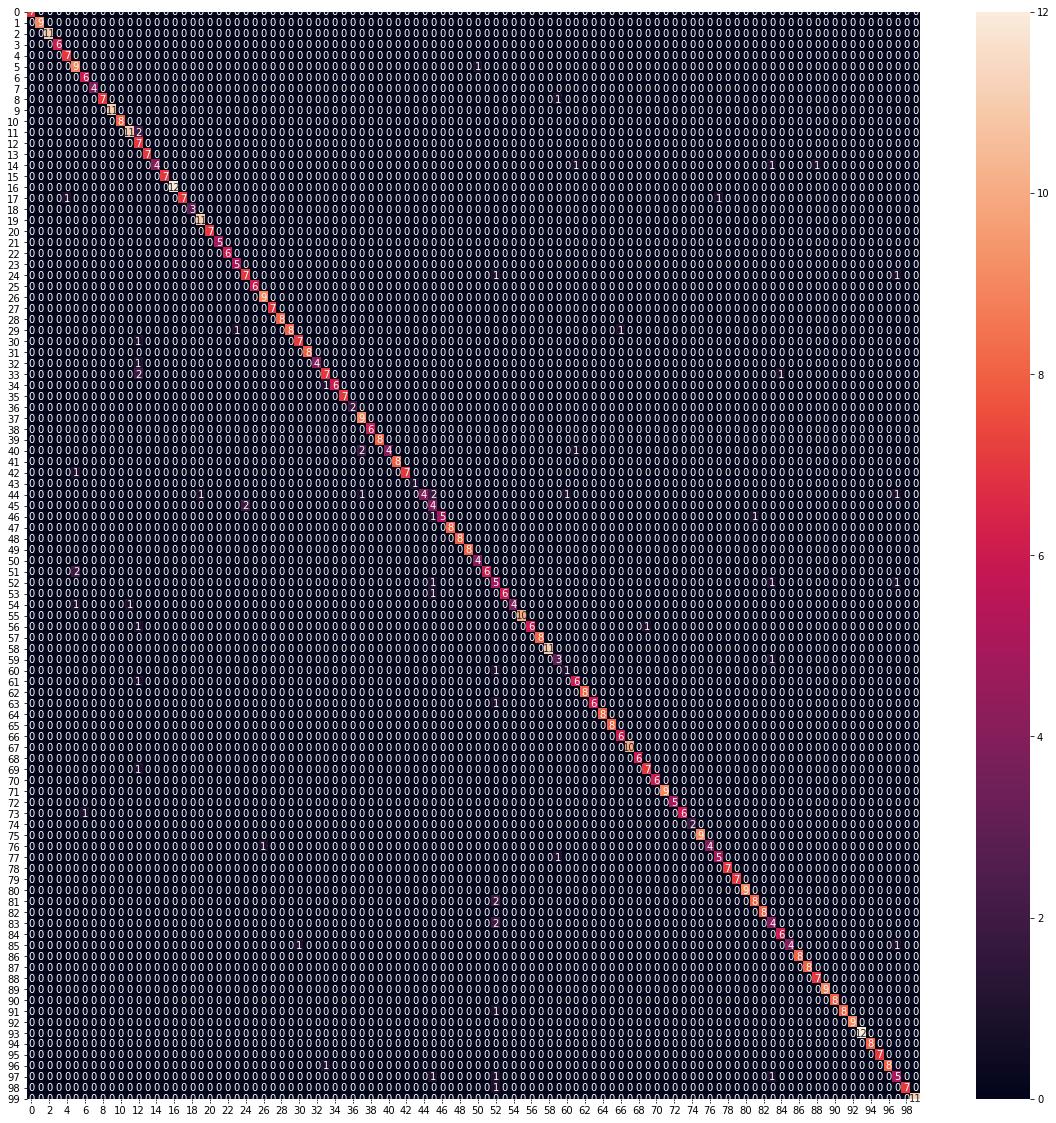

In [20]:
df_cm = pd.DataFrame(conf, index = [str(i) for i in range(100)],
                  columns = [str(i) for i in range(100)])
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, annot=True)
plt.show()

## DEEP LEARNING

In [1]:
import pandas as pd
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

df = pd.read_pickle('clean_data.pkl')
df.head(2)

,FileName,user,sample,label,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0000f00.fpg,0,00,0,3005.0,1586.0,962.108911,1.894704,10,28,...,89.591717,35.055068,1023.0,126.0,62.0,96.805324,37.704918,219.12,126.00,62.00
1,0000f01.fpg,0,01,0,2538.0,1373.0,938.732673,1.848507,7,27,...,91.709105,23.193845,1023.0,107.0,64.0,100.000000,19.446468,837.87,106.01,63.01


In [2]:
#df.dtypes
#FileName,sample,dist_list,new_x,new_y,new_pressure,new_azi,new_pen_el
new_df = df.drop(['FileName','sample','dist_list','new_x','new_y','new_pressure','new_azi','new_pen_el'], axis=1)

In [3]:
new_df = new_df.loc[df.label == 1]

In [4]:
new_df = new_df.loc[df.label == 1]
target = new_df.pop('user')
x_train,x_test,y_train,y_test = train_test_split(new_df ,target ,test_size = 0.3,random_state = 23)

In [5]:
del(x_train['label'])
del(x_test['label'])

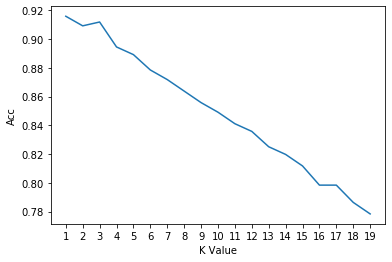

In [18]:
#from sklearn.neighbors import KNeighborsClassifier
l = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors = i) 
    clf.fit(x_train, y_train) 
    #clf.predict(x_test[:10])
    l.append(metrics.accuracy_score(clf.predict(x_test),y_test))
plt.plot([x for x in range(1,20)],l)
plt.xticks(np.arange(min([x for x in range(1,20)]), max([x for x in range(1,20)])+1, 1.0))
plt.xlabel('K Value')
plt.ylabel('Acc')
plt.show()

In [26]:
x_train.shape

(1747, 512)

In [27]:
y_train.shape

(1747,)

In [28]:
x_test.shape

(749, 513)

### 6 layers

In [29]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(450, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200,activation = 'relu'),
    tf.keras.layers.Dense(1505,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00075),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model
#model = get_compiled_model()
historty = model.fit(x_train.values,y_train.values,epochs=100,validation_data=(x_test.values[:249], y_test.values[:249]))

Epoch 1/100
55/55 [==============================] - 1s 14ms/step - loss: 0.4319 - accuracy: 0.8867 - val_loss: 0.6953 - val_accuracy: 0.8474
Epoch 2/100
55/55 [==============================] - 1s 15ms/step - loss: 0.3760 - accuracy: 0.9056 - val_loss: 0.8232 - val_accuracy: 0.8434
Epoch 3/100
55/55 [==============================] - 1s 14ms/step - loss: 0.4437 - accuracy: 0.8907 - val_loss: 0.7809 - val_accuracy: 0.8233
Epoch 4/100
55/55 [==============================] - 1s 14ms/step - loss: 0.3678 - accuracy: 0.9021 - val_loss: 0.6012 - val_accuracy: 0.8635
Epoch 5/100
55/55 [==============================] - 1s 14ms/step - loss: 0.3967 - accuracy: 0.9027 - val_loss: 0.9055 - val_accuracy: 0.8233
Epoch 6/100
55/55 [==============================] - 1s 14ms/step - loss: 46.9964 - accuracy: 0.8185 - val_loss: 4.1987 - val_accuracy: 0.3494
Epoch 7/100
55/55 [==============================] - 1s 15ms/step - loss: 2.7542 - accuracy: 0.4293 - val_loss: 2.0855 - val_accuracy: 0.5221
Epoch

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

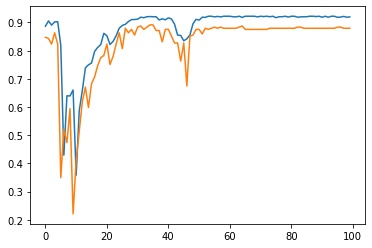

In [30]:
plt.plot(historty.history['accuracy'])
plt.plot(historty.history['val_accuracy'])

In [31]:
results = model.evaluate(x_test[249:], y_test[249:])

W0519 22:00:21.990721 16848 base_layer.py:2081] Layer dense_33 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



16/16 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.8900


### 5 layers

Epoch 1/100
55/55 [==============================] - 0s 7ms/step - loss: 5.5737 - accuracy: 0.0704 - val_loss: 4.5325 - val_accuracy: 0.0241
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 4.2846 - accuracy: 0.0681 - val_loss: 4.1159 - val_accuracy: 0.0683
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 3.9475 - accuracy: 0.1185 - val_loss: 4.0035 - val_accuracy: 0.0924
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 3.8151 - accuracy: 0.1168 - val_loss: 4.0154 - val_accuracy: 0.0723
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 3.9247 - accuracy: 0.1007 - val_loss: 3.9747 - val_accuracy: 0.0723
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 3.7304 - accuracy: 0.1128 - val_loss: 3.9838 - val_accuracy: 0.0964
Epoch 7/100
55/55 [==============================] - 0s 7ms/step - loss: 3.6762 - accuracy: 0.1294 - val_loss: 4.1573 - val_accuracy: 0.0924
Epoch 8/100
5

Epoch 59/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3957 - accuracy: 0.3955 - val_loss: 2.7272 - val_accuracy: 0.3574
Epoch 60/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3591 - accuracy: 0.4116 - val_loss: 3.2963 - val_accuracy: 0.2851
Epoch 61/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3089 - accuracy: 0.4219 - val_loss: 2.8476 - val_accuracy: 0.3695
Epoch 62/100
55/55 [==============================] - 0s 6ms/step - loss: 2.1779 - accuracy: 0.4499 - val_loss: 2.6261 - val_accuracy: 0.3815
Epoch 63/100
55/55 [==============================] - 0s 6ms/step - loss: 2.1522 - accuracy: 0.4585 - val_loss: 2.8020 - val_accuracy: 0.3414
Epoch 64/100
55/55 [==============================] - 0s 6ms/step - loss: 2.2182 - accuracy: 0.4442 - val_loss: 2.4730 - val_accuracy: 0.3574
Epoch 65/100
55/55 [==============================] - 0s 5ms/step - loss: 2.1140 - accuracy: 0.4637 - val_loss: 2.4738 - val_accuracy: 0.4056
Epoch 

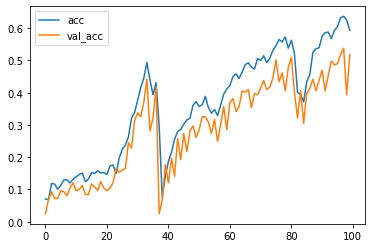

In [20]:
def get_compiled_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(400, activation='relu'),
    #tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    #tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    #tf.keras.layers.Dense(125,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model
#model_1 = get_compiled_model_1()
historty = model_1.fit(x_train.values,y_train.values,epochs=100,validation_data=(x_test.values[:249], y_test.values[:249]))
plt.plot(historty.history['accuracy'])
plt.plot(historty.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

In [19]:
results = model_1.evaluate(x_test[249:], y_test[249:])

W0519 21:49:45.525408 16848 base_layer.py:2081] Layer dense_22 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



16/16 [==============================] - 0s 3ms/step - loss: 3.4730 - accuracy: 0.2360


### Knn

In [98]:
def knn_model(k):
    s=[]
    for i in range(1,k+1):
        clf = KNeighborsClassifier(n_neighbors = i) 
        clf.fit(x_train, y_train) 
        s.append(metrics.accuracy_score(clf.predict(x_test),y_test))
    return s

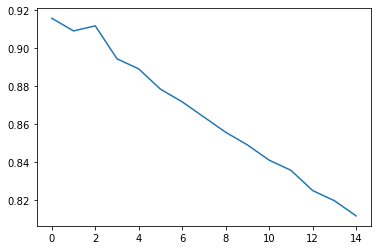

In [101]:
plt.plot(knn_model(15))
plt.show()

## AutoEncoder

In [40]:
def autoencoder():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_shape = (512,),activation = 'relu',units = 512),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    #tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(125,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(125,activation='relu'),
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(250,activation= 'relu'),
    tf.keras.layers.Dense(350,activation = 'relu'),
    tf.keras.layers.Dense(512,activation = 'relu')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.MeanSquaredLogarithmicError(),
                metrics=['accuracy'])
    model.summary()
    return model

In [42]:
from ann_visualizer.visualize import ann_viz
ann_viz(auto_model, view=True, filename="vis_model.gv")

ValueError: ANN Visualizer: Layer not supported for visualizing

In [41]:
auto_model = autoencoder()
historty = auto_model.fit(x_train.values,x_train.values,epochs=120,validation_data=(x_test.values[:249], x_test.values[:249]))
plt.plot(historty.history['acc'])
plt.plot(historty.history['val_acc'])
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_55 (Dense)             (None, 350)               179550    
_________________________________________________________________
dense_56 (Dense)             (None, 250)               87750     
_________________________________________________________________
dense_57 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_58 (Dense)             (None, 125)               18875     
_________________________________________________________________
dense_59 (Dense)             (None, 100)               12600     
_________________________________________________________________
dense_60 (Dense)             (None, 125)              

Epoch 46/120
55/55 [==============================] - 1s 14ms/step - loss: 4.3069 - accuracy: 0.9170 - val_loss: 3.9250 - val_accuracy: 0.9398
Epoch 47/120
55/55 [==============================] - 1s 12ms/step - loss: 4.2901 - accuracy: 0.9187 - val_loss: 3.9095 - val_accuracy: 0.9398
Epoch 48/120
55/55 [==============================] - 1s 12ms/step - loss: 4.2881 - accuracy: 0.9187 - val_loss: 3.9161 - val_accuracy: 0.9398
Epoch 49/120
55/55 [==============================] - 1s 12ms/step - loss: 4.2940 - accuracy: 0.9164 - val_loss: 3.9128 - val_accuracy: 0.9398
Epoch 50/120
55/55 [==============================] - 1s 12ms/step - loss: 4.2830 - accuracy: 0.9187 - val_loss: 3.9328 - val_accuracy: 0.9398
Epoch 51/120
55/55 [==============================] - 1s 12ms/step - loss: 4.3111 - accuracy: 0.9187 - val_loss: 3.9421 - val_accuracy: 0.9398
Epoch 52/120
55/55 [==============================] - 1s 12ms/step - loss: 4.2709 - accuracy: 0.9164 - val_loss: 3.8891 - val_accuracy: 0.9398

KeyError: 'acc'

In [17]:
x_train.shape

(1747, 512)

In [37]:
results = auto_model.evaluate(x_test[249:], x_test[249:])

500/500 [==============================] - 0s 156us/sample - loss: 3.8567 - acc: 0.8980


In [49]:
pred = auto_model.predict(x_test[1:2])

In [43]:
from keras.layers import Input, Dense
from keras.models import Model
input_s= Input(shape=(512,))

In [44]:
encoded = Dense(units=300, activation='relu')(input_s)
encoded = Dense(units=200, activation='relu')(encoded)
encoded = Dense(units=100, activation='relu')(encoded)
decoded = Dense(units=200, activation='relu')(encoded)
decoded = Dense(units=300, activation='relu')(decoded)
decoded = Dense(units=512, activation='relu')(decoded)
autoencoder=Model(input_s, decoded)
encoder = Model(input_s, encoded)
autoencoder.summary()
encoder.summary()
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               153900    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1541

In [67]:
autoencoder.fit(x_train, x_train,
                epochs=100,                
                validation_data=(x_test, x_test))

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(autoencoder, view=True, filename="vis_model.gv")

In [74]:
predicted = autoencoder.predict(x_test)

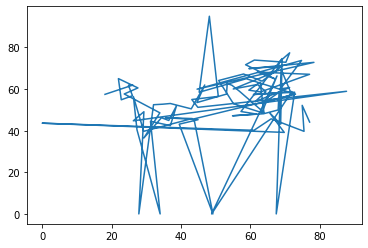

In [111]:
plt.plot(predicted[12][12::5],predicted[12][13::5])

In [102]:
x_test.head(1)

,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,pen_up,sign_time,x_speed,y_speed,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
4388,3126.0,1085.0,404.355844,2.881106,11,26,93,3.85,8.119481,2.818182,...,76.456525,19.660292,0.0,149.0,55.0,79.846449,5.714286,432.2,150.3,55.15


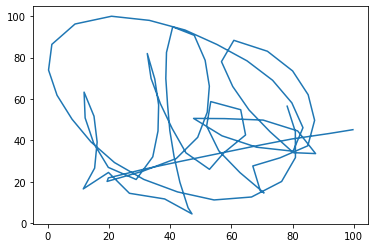

In [110]:
plt.plot(x_test.values[12][12::5],x_test.values[12][13::5])
#x_test.columns[17]

In [119]:
enc =encoder.predict(x_train.values)

In [124]:
len(enc[0])

100

## Label Model

In [12]:
fg_data = df.drop(['FileName','dist_list','new_x','new_y','new_pressure','new_azi','new_pen_el'], axis=1)
fg_data['sample'] = fg_data['sample'].apply(pd.to_numeric) 
f_data = fg_data.loc[fg_data['label']==0]
g_data = fg_data.loc[fg_data['label']==1]
fg_data.head()

,user,sample,label,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,pen_up,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0,0,0,3005.0,1586.0,962.108911,1.894704,10,28,0,...,89.606514,35.060504,1023.0,126.00,62.00,96.805324,37.704918,219.12,126.00,62.00
1,0,1,0,2538.0,1373.0,938.732673,1.848507,7,27,0,...,91.829454,23.172350,1023.0,107.00,64.00,100.000000,19.446468,837.87,106.01,63.01
2,0,2,0,2005.0,1481.0,947.141593,1.353815,6,24,0,...,86.191531,5.276292,1023.0,105.00,64.00,92.817955,4.523970,1023.00,103.26,64.87
3,0,3,0,2210.0,1434.0,899.801802,1.541144,9,22,0,...,63.901283,12.791157,1023.0,108.78,67.22,72.986425,17.015342,416.02,109.89,67.89
4,0,4,0,2136.0,1469.0,900.307087,1.454050,13,39,0,...,69.078897,4.767368,1023.0,129.08,66.00,78.370787,9.870660,968.98,128.00,67.46


Epoch 1/10
1/1 [==============================] - 0s 0s/step - loss: 798.1719 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 0s/step - loss: 24.9530 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 3.7547 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 0s/step - loss: 11.8115 - accuracy: 0.5333
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 1.2917 - accuracy: 0.7667
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 7.5987 - accuracy: 0.5333
Epoch 7/10
1/1 [==============================] - 0s 0s/step - loss: 3.1625 - accuracy: 0.6333
Epoch 8/10
1/1 [==============================] - 0s 0s/step - loss: 0.0245 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 0s/step - loss: 9.9598 - accuracy: 0.5333
Epoch 10/10
1/1 [==============================] - 0s 0s/step - loss: 0.0060 - accuracy: 1.0000


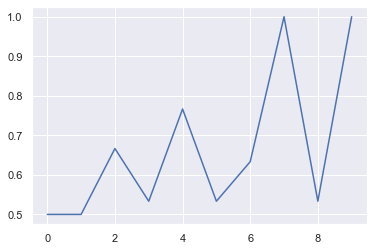

In [25]:
train_data = fg_data.loc[fg_data['sample']<15]
test_data = fg_data.loc[fg_data['sample']>=15]
train_data_0= train_data.loc[train_data['user']==0]
test_data_0= test_data.loc[test_data['user']==0]
train_label_0 = train_data_0.pop('label')
test_label_0 = test_data_0.pop('label')


def get_compiled_model_user():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='selu'),
    tf.keras.layers.Dense(100, activation='selu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005),loss='binary_crossentropy',
    metrics=['accuracy'])
    return model
model_user = get_compiled_model_user()
historty = model_user.fit(train_data_0.values,train_label_0.values,epochs=10)
plt.plot(historty.history['accuracy'])
#plt.plot(historty.history['val_accuracy'])
plt.show()


#label = fg_data.pop('label')
#del(f_data['label'])
#del(g_data['label'])
#x_train,x_test,y_train,y_test = train_test_split(fg_data ,label ,test_size = 0.3,random_state = 23)

In [26]:
model_user.evaluate(test_data_0.values,test_label_0.values)

1/1 [==============================] - 0s 16ms/step - loss: 1.2045e-04 - accuracy: 1.0000


[0.00012045105540892109, 1.0]

Train on 3337 samples, validate on 249 samples
Epoch 1/100
3337/3337 [==============================] - 2s 580us/sample - loss: 789.6051 - acc: 0.5133 - val_loss: 174.2540 - val_acc: 0.4980
Epoch 2/100
3337/3337 [==============================] - 1s 394us/sample - loss: 363.2390 - acc: 0.5430 - val_loss: 151.7259 - val_acc: 0.6185
Epoch 3/100
3337/3337 [==============================] - 1s 403us/sample - loss: 199.6161 - acc: 0.5799 - val_loss: 71.2595 - val_acc: 0.5863
Epoch 4/100
3337/3337 [==============================] - 1s 406us/sample - loss: 145.4039 - acc: 0.6005 - val_loss: 98.0864 - val_acc: 0.5301
Epoch 5/100
3337/3337 [==============================] - 1s 407us/sample - loss: 44.6781 - acc: 0.6191 - val_loss: 152.6038 - val_acc: 0.6426
Epoch 6/100
3337/3337 [==============================] - 1s 384us/sample - loss: 32.2167 - acc: 0.6074 - val_loss: 55.1848 - val_acc: 0.6104
Epoch 7/100
3337/3337 [==============================] - 1s 381us/sample - loss: 48.9509 - acc: 0.63

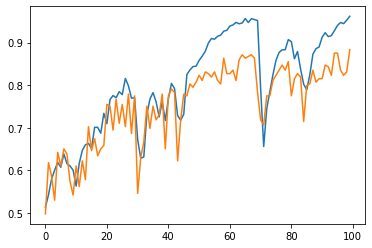

In [16]:
def get_compiled_model_user():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='selu'),
    tf.keras.layers.Dense(100, activation='selu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005),loss='binary_crossentropy',
    metrics=['accuracy'])
    return model
model_user = get_compiled_model_user()
historty = model_user.fit(x_train.values,y_train.values,epochs=100,validation_data=(x_test.values[:249], y_test.values[:249]))
plt.plot(historty.history['acc'])
plt.plot(historty.history['val_acc'])
plt.show()

In [17]:
pred = model_user.predict(x_test[249:])

In [18]:
outcome = []
for i in list(pred):
    if i >=0.5:
        outcome.append(1)
    else:
        outcome.append(0)

In [148]:
print(tf.math.confusion_matrix(labels = y_test[249:],predictions =  outcome))

Tensor("confusion_matrix_1/SparseTensorDenseAdd:0", shape=(2, 2), dtype=int32)


In [19]:
user_conf = confusion_matrix(y_test[249:], outcome)
user_conf

array([[484,  91],
       [ 65, 542]], dtype=int64)

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test[249:], outcome).ravel()
print(tn,fp,fn,tp)

484 91 65 542


In [14]:
(tn+tp)/(tn+fp+fn+tp)

0.8375634517766497

In [21]:
(fn)/(tn+fp+fn+tp)

0.07529610829103214

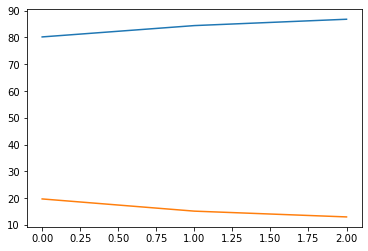

In [198]:
acc_user = [80.2028,84.4331,86.8020]
err_user = [19.7123,15.1566,13]
epoc = [75,150,150]
#3rd is selu
plt.plot(acc_user)
plt.plot(err_user)
plt.show()

In [188]:
model_user.predict(f_data.values)
f_check = []
for i in list(model_user.predict(f_data.values)):
    if i >=0.5:
        f_check.append(1)
    else:
        f_check.append(0)

In [189]:
model_user.predict(g_data.values)
g_check = []
for i in list(model_user.predict(g_data.values)):
    if i >=0.5:
        g_check.append(1)
    else:
        g_check.append(0)

In [187]:
#len(f_check)
len(g_check)

2496

In [190]:
actual_f = [0]*2272
actual_g = [1]*2496
len(actual)

2272

In [192]:
false_check = confusion_matrix(actual_f, f_check)
true_check = confusion_matrix(actual_g, g_check)

In [195]:
false_check
print(2089/(2089+183))

0.9194542253521126


In [196]:
true_check
print(2313/(183+2313))

0.9266826923076923


In [40]:
ta = [14,100,100,100,100]
va = [7.5,67,85.5,89.5,92.3]
acc =[6.2,66.2,85,87,90]
xv = [2,3,4,5,6]

[]

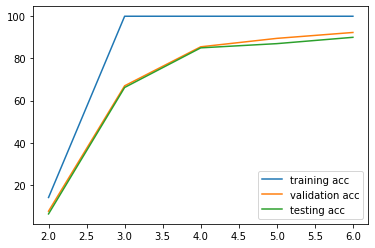

In [41]:
plt.plot(xv,ta)
plt.plot(xv,va)
plt.plot(xv,acc)
plt.legend(['training acc','validation acc','testing acc'])
plt.plot()

# Final

In [1]:
import pandas as pd
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns
sns.set()

df = pd.read_pickle('clean_data_v2.pkl')
df.head(2)

,FileName,user,sample,label,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0000f00.fpg,0,00,0,3005.0,1586.0,962.108911,1.894704,10,28,...,89.606514,35.060504,1023.0,126.0,62.0,96.805324,37.704918,219.12,126.00,62.00
1,0000f01.fpg,0,01,0,2538.0,1373.0,938.732673,1.848507,7,27,...,91.829454,23.172350,1023.0,107.0,64.0,100.000000,19.446468,837.87,106.01,63.01


In [2]:
drop_col = ['FileName','new_x','new_y','new_pen_el','new_azi','new_pressure','dist_list']
df.drop(drop_col,axis = 1,inplace = True)

In [3]:
df.head()

,user,sample,label,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,pen_up,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0,00,0,3005.0,1586.0,962.108911,1.894704,10,28,0,...,89.606514,35.060504,1023.0,126.00,62.00,96.805324,37.704918,219.12,126.00,62.00
1,0,01,0,2538.0,1373.0,938.732673,1.848507,7,27,0,...,91.829454,23.172350,1023.0,107.00,64.00,100.000000,19.446468,837.87,106.01,63.01
2,0,02,0,2005.0,1481.0,947.141593,1.353815,6,24,0,...,86.191531,5.276292,1023.0,105.00,64.00,92.817955,4.523970,1023.00,103.26,64.87
3,0,03,0,2210.0,1434.0,899.801802,1.541144,9,22,0,...,63.901283,12.791157,1023.0,108.78,67.22,72.986425,17.015342,416.02,109.89,67.89
4,0,04,0,2136.0,1469.0,900.307087,1.454050,13,39,0,...,69.078897,4.767368,1023.0,129.08,66.00,78.370787,9.870660,968.98,128.00,67.46


In [4]:
gen_sign = df.loc[df.label == 1]
target = gen_sign.pop('user')
x_train,x_test,y_train,y_test = train_test_split(gen_sign ,target ,test_size = 0.3,random_state = 23)
del(x_train['label'])
del(x_test['label'])

In [5]:
del(x_test['sample'])
del(x_train['sample'])

In [6]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(125,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model

def get_compiled_model2():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(450, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(125,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model

def get_compiled_model3():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dense(250, activation='selu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='selu'),
    tf.keras.layers.Dense(125,activation = 'selu'),
    tf.keras.layers.Dense(100,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model


model = get_compiled_model()

historty = model.fit(x_train.values,y_train.values,epochs=150)



model2 = get_compiled_model2()

historty2 = model2.fit(x_train.values,y_train.values,epochs=150)

Epoch 1/150
55/55 [==============================] - 1s 9ms/step - loss: 2435.3271 - accuracy: 0.0143
Epoch 2/150
55/55 [==============================] - 1s 11ms/step - loss: 512.5283 - accuracy: 0.0229
Epoch 3/150
55/55 [==============================] - 1s 9ms/step - loss: 192.8715 - accuracy: 0.0395
Epoch 4/150
55/55 [==============================] - 1s 9ms/step - loss: 139.1420 - accuracy: 0.0475
Epoch 5/150
55/55 [==============================] - 1s 9ms/step - loss: 70.1057 - accuracy: 0.0899
Epoch 6/150
55/55 [==============================] - 1s 9ms/step - loss: 65.8661 - accuracy: 0.0990
Epoch 7/150
55/55 [==============================] - 1s 10ms/step - loss: 39.3481 - accuracy: 0.1626
Epoch 8/150
55/55 [==============================] - 1s 10ms/step - loss: 37.1638 - accuracy: 0.2158
Epoch 9/150
55/55 [==============================] - 1s 10ms/step - loss: 51.3502 - accuracy: 0.2530
Epoch 10/150
55/55 [==============================] - 1s 10ms/step - loss: 28.0246 - accura

55/55 [==============================] - 1s 10ms/step - loss: 20.0406 - accuracy: 0.5020
Epoch 13/150
55/55 [==============================] - 1s 10ms/step - loss: 21.4285 - accuracy: 0.5919
Epoch 14/150
55/55 [==============================] - 0s 9ms/step - loss: 12.5623 - accuracy: 0.6331
Epoch 15/150
55/55 [==============================] - 0s 9ms/step - loss: 11.8709 - accuracy: 0.7018
Epoch 16/150
55/55 [==============================] - 1s 9ms/step - loss: 9.8636 - accuracy: 0.7350
Epoch 17/150
55/55 [==============================] - 0s 9ms/step - loss: 9.0265 - accuracy: 0.7699
Epoch 18/150
55/55 [==============================] - 0s 9ms/step - loss: 11.6378 - accuracy: 0.7842
Epoch 19/150
55/55 [==============================] - 0s 9ms/step - loss: 12.7262 - accuracy: 0.8105
Epoch 20/150
55/55 [==============================] - 1s 9ms/step - loss: 17.0673 - accuracy: 0.7853
Epoch 21/150
55/55 [==============================] - 1s 9ms/step - loss: 30.3695 - accuracy: 0.8226
Epo

55/55 [==============================] - 1s 9ms/step - loss: 0.2694 - accuracy: 0.9433
Epoch 94/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2685 - accuracy: 0.9433
Epoch 95/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2674 - accuracy: 0.9433
Epoch 96/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2667 - accuracy: 0.9433 0s - loss: 0.1634 
Epoch 97/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2659 - accuracy: 0.9433
Epoch 98/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2652 - accuracy: 0.9433
Epoch 99/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2644 - accuracy: 0.9433
Epoch 100/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2637 - accuracy: 0.9433
Epoch 101/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2629 - accuracy: 0.9433
Epoch 102/150
55/55 [==============================] - 1s 10ms/step - loss: 0.2622 -

24/24 [==============================] - 0s 5ms/step - loss: 0.6372 - accuracy: 0.9052
[0.6371973156929016, 0.9052069187164307]


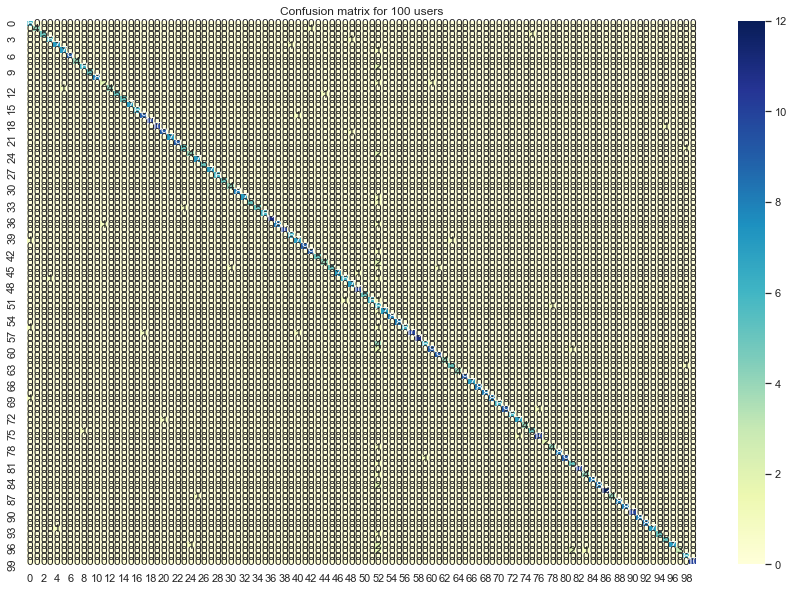

In [8]:
import seaborn as sn
scores = model.evaluate(x_test, y_test)
print(scores)
pred = model.predict(x_test)
pred = np.argmax(pred,axis =1)
conf = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(conf, index = [str(i) for i in range(100)],
                  columns = [str(i) for i in range(100)])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix for 100 users')
#plt.savefig('.\plots_and_graphs\confusion_matrix_50_users.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'val_accuracy'

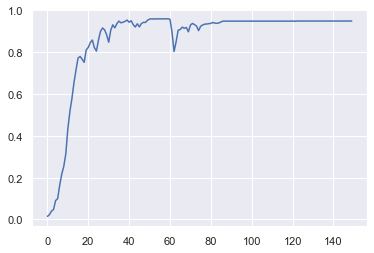

In [11]:
plt.plot(historty.history['accuracy'])
plt.plot(historty.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

plt.plot(historty2.history['accuracy'])
plt.plot(historty2.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

In [6]:
drop_col_list = ['x_len','y_len','dif_az','dif_pen']
x_train.drop(drop_col_list, axis = 1 ,inplace = True)
x_test.drop(drop_col_list ,axis = 1 ,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [131]:
model2 = get_compiled_model()
historty2 = model2.fit(x_train.values,y_train.values,epochs=150,validation_data=(x_test.values, y_test.values))

Train on 1747 samples, validate on 749 samples
Epoch 1/150
1747/1747 [==============================] - 1s 389us/sample - loss: 1980.3015 - acc: 0.0166 - val_loss: 488.6604 - val_acc: 0.0214
Epoch 2/150
1747/1747 [==============================] - 0s 242us/sample - loss: 370.7108 - acc: 0.0298 - val_loss: 270.7344 - val_acc: 0.0227
Epoch 3/150
1747/1747 [==============================] - 0s 247us/sample - loss: 166.8716 - acc: 0.0487 - val_loss: 205.3413 - val_acc: 0.0628
Epoch 4/150
1747/1747 [==============================] - 0s 239us/sample - loss: 146.7241 - acc: 0.0750 - val_loss: 124.4459 - val_acc: 0.0654
Epoch 5/150
1747/1747 [==============================] - 0s 247us/sample - loss: 125.6936 - acc: 0.0927 - val_loss: 152.1232 - val_acc: 0.0721
Epoch 6/150
1747/1747 [==============================] - 0s 242us/sample - loss: 80.2196 - acc: 0.1288 - val_loss: 95.8067 - val_acc: 0.1188
Epoch 7/150
1747/1747 [==============================] - 0s 256us/sample - loss: 78.8894 - acc: 

1747/1747 [==============================] - 1s 296us/sample - loss: 0.2341 - acc: 0.9473 - val_loss: 0.8377 - val_acc: 0.8732
Epoch 117/150
1747/1747 [==============================] - 0s 278us/sample - loss: 0.2335 - acc: 0.9473 - val_loss: 0.8371 - val_acc: 0.8732
Epoch 118/150
1747/1747 [==============================] - 0s 233us/sample - loss: 0.2329 - acc: 0.9473 - val_loss: 0.8380 - val_acc: 0.8732
Epoch 119/150
1747/1747 [==============================] - 0s 265us/sample - loss: 0.2322 - acc: 0.9473 - val_loss: 0.8382 - val_acc: 0.8732
Epoch 120/150
1747/1747 [==============================] - 0s 247us/sample - loss: 0.2316 - acc: 0.9473 - val_loss: 0.8387 - val_acc: 0.8732
Epoch 121/150
1747/1747 [==============================] - 0s 260us/sample - loss: 0.2310 - acc: 0.9473 - val_loss: 0.8381 - val_acc: 0.8732
Epoch 122/150
1747/1747 [==============================] - 1s 287us/sample - loss: 0.2304 - acc: 0.9473 - val_loss: 0.8392 - val_acc: 0.8732
Epoch 123/150
1747/1747 [==

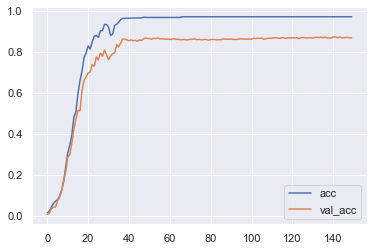

In [132]:
plt.plot(historty.history['acc'])
plt.plot(historty.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

In [141]:
model3 = get_compiled_model3()
historty3 = model3.fit(x_train.values,y_train.values,epochs=150,validation_data=(x_test.values, y_test.values))

Train on 1747 samples, validate on 749 samples
Epoch 1/150
1747/1747 [==============================] - 3s 2ms/sample - loss: 15.5831 - acc: 0.0103 - val_loss: 16.7621 - val_acc: 0.0160
Epoch 2/150
1747/1747 [==============================] - 1s 478us/sample - loss: 16.9435 - acc: 0.0080 - val_loss: 16.8013 - val_acc: 0.0107
Epoch 3/150
1747/1747 [==============================] - 1s 528us/sample - loss: 16.9724 - acc: 0.0057 - val_loss: 16.6984 - val_acc: 0.0160
Epoch 4/150
1747/1747 [==============================] - 1s 542us/sample - loss: 16.6648 - acc: 0.0086 - val_loss: 16.3806 - val_acc: 0.0160
Epoch 5/150
1747/1747 [==============================] - 1s 522us/sample - loss: 16.5345 - acc: 0.0074 - val_loss: 16.3806 - val_acc: 0.0160
Epoch 6/150
1747/1747 [==============================] - 1s 488us/sample - loss: 16.5342 - acc: 0.0074 - val_loss: 16.3806 - val_acc: 0.0160
Epoch 7/150
1747/1747 [==============================] - ETA: 0s - loss: 16.5354 - acc: 0.00 - 1s 489us/sampl

KeyboardInterrupt: 

In [145]:
x_train.columns

Index(['avg_ps', 'ratio', 'pen_up', 'sign_time', 'x_speed', 'y_speed',
       'x_size', 'total_length', 'tx0', 'ty0',
       ...
       'tx98', 'ty98', 'tp98', 'ta98', 'te98', 'tx99', 'ty99', 'tp99', 'ta99',
       'te99'],
      dtype='object', length=508)

In [7]:
r_a = [('ta'+str(i)) for i in range(100)]
x_train.drop(r_a,axis = 1,inplace = True)
x_test.drop(r_a,axis = 1,inplace = True)

In [164]:
model4 = get_compiled_model3()

historty4 = model4.fit(x_train.values,y_train.values,epochs=150,validation_data=(x_test.values, y_test.values))



model5 = get_compiled_model2()

historty5 = model5.fit(x_train.values,y_train.values,epochs=150,validation_data=(x_test.values, y_test.values))

Train on 1747 samples, validate on 749 samples
Epoch 1/150
1747/1747 [==============================] - 3s 1ms/sample - loss: 2467.1087 - acc: 0.0143 - val_loss: 736.5818 - val_acc: 0.0187
Epoch 2/150
1747/1747 [==============================] - 1s 502us/sample - loss: 450.6239 - acc: 0.0372 - val_loss: 272.4848 - val_acc: 0.0427
Epoch 3/150
1747/1747 [==============================] - 1s 495us/sample - loss: 240.4409 - acc: 0.0452 - val_loss: 183.0451 - val_acc: 0.0240
Epoch 4/150
1747/1747 [==============================] - 1s 495us/sample - loss: 194.5648 - acc: 0.0761 - val_loss: 225.1504 - val_acc: 0.0654
Epoch 5/150
1747/1747 [==============================] - 1s 496us/sample - loss: 141.2507 - acc: 0.0750 - val_loss: 134.2406 - val_acc: 0.0761
Epoch 6/150
1747/1747 [==============================] - 1s 588us/sample - loss: 105.3882 - acc: 0.1517 - val_loss: 82.7541 - val_acc: 0.1389
Epoch 7/150
1747/1747 [==============================] - 1s 496us/sample - loss: 72.7730 - acc: 0

1747/1747 [==============================] - 1s 463us/sample - loss: 0.1920 - acc: 0.9468 - val_loss: 0.7507 - val_acc: 0.8812
Epoch 117/150
1747/1747 [==============================] - 1s 491us/sample - loss: 0.1920 - acc: 0.9462 - val_loss: 0.7507 - val_acc: 0.8852
Epoch 118/150
1747/1747 [==============================] - 1s 502us/sample - loss: 0.1921 - acc: 0.9468 - val_loss: 0.7532 - val_acc: 0.8825
Epoch 119/150
1747/1747 [==============================] - 1s 496us/sample - loss: 0.1921 - acc: 0.9468 - val_loss: 0.7552 - val_acc: 0.8812
Epoch 120/150
1747/1747 [==============================] - 1s 501us/sample - loss: 0.1920 - acc: 0.9468 - val_loss: 0.7562 - val_acc: 0.8812
Epoch 121/150
1747/1747 [==============================] - 1s 440us/sample - loss: 0.1917 - acc: 0.9462 - val_loss: 0.7571 - val_acc: 0.8825
Epoch 122/150
1747/1747 [==============================] - 1s 440us/sample - loss: 0.1919 - acc: 0.9445 - val_loss: 0.7587 - val_acc: 0.8825
Epoch 123/150
1747/1747 [==

Epoch 24/150
1747/1747 [==============================] - 1s 459us/sample - loss: 9.8975 - acc: 0.7796 - val_loss: 39.6696 - val_acc: 0.6422
Epoch 25/150
1747/1747 [==============================] - 1s 435us/sample - loss: 13.0802 - acc: 0.7630 - val_loss: 54.5372 - val_acc: 0.6649
Epoch 26/150
1747/1747 [==============================] - 1s 459us/sample - loss: 16.8627 - acc: 0.7499 - val_loss: 41.5232 - val_acc: 0.6542
Epoch 27/150
1747/1747 [==============================] - 1s 457us/sample - loss: 7.0447 - acc: 0.7882 - val_loss: 55.6281 - val_acc: 0.6636
Epoch 28/150
1747/1747 [==============================] - 1s 439us/sample - loss: 8.9658 - acc: 0.7710 - val_loss: 31.6380 - val_acc: 0.6943
Epoch 29/150
1747/1747 [==============================] - 1s 449us/sample - loss: 8.5384 - acc: 0.8140 - val_loss: 51.6258 - val_acc: 0.7089
Epoch 30/150
1747/1747 [==============================] - 1s 448us/sample - loss: 9.0614 - acc: 0.8558 - val_loss: 44.8518 - val_acc: 0.7423
Epoch 31/15

1747/1747 [==============================] - 1s 484us/sample - loss: 0.2032 - acc: 0.9496 - val_loss: 0.7643 - val_acc: 0.8812
Epoch 141/150
1747/1747 [==============================] - 1s 476us/sample - loss: 0.2027 - acc: 0.9496 - val_loss: 0.7641 - val_acc: 0.8798
Epoch 142/150
1747/1747 [==============================] - 1s 480us/sample - loss: 0.2023 - acc: 0.9496 - val_loss: 0.7642 - val_acc: 0.8798
Epoch 143/150
1747/1747 [==============================] - 1s 458us/sample - loss: 0.2019 - acc: 0.9496 - val_loss: 0.7652 - val_acc: 0.8798
Epoch 144/150
1747/1747 [==============================] - 1s 442us/sample - loss: 0.2014 - acc: 0.9496 - val_loss: 0.7658 - val_acc: 0.8798
Epoch 145/150
1747/1747 [==============================] - 1s 518us/sample - loss: 0.2010 - acc: 0.9496 - val_loss: 0.7675 - val_acc: 0.8798
Epoch 146/150
1747/1747 [==============================] - 1s 461us/sample - loss: 0.2006 - acc: 0.9496 - val_loss: 0.7678 - val_acc: 0.8785
Epoch 147/150
1747/1747 [==

# changing number of users

In [42]:
!pip install ann_visualizer

  Stored in directory: C:\Users\MAHE\AppData\Local\pip\Cache\wheels\b6\b4\4e\d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [278]:
df2 = pd.read_pickle('clean_data_v2.pkl')
drop_col = ['FileName','new_x','new_y','new_pen_el','new_azi','new_pressure','dist_list']
df2.drop(drop_col,axis = 1,inplace = True)

In [279]:
df2 = df2.loc[df2['user']<30]
df2 = df2.loc[df2['user']>=10]
df2 = df2.loc[df2['label']==1]
df2.shape

(500, 515)

In [281]:
df2['sample'] = df2['sample'].apply(pd.to_numeric) 
train_df2 = df2.loc[df2['sample'] <15]
test_df2 = df2.loc[df2['sample'] >=15]
train_df2.shape

(300, 515)

In [282]:
train_tar = train_df2.pop('user')
test_tar = test_df2.pop('user')
del(train_df2['sample'])
del(test_df2['sample'])
train_df2.drop(['x_speed','y_speed','x_size','label','x_len','y_len','avg_ps','dif_pen','dif_az'],axis=1,inplace = True)#'label','x_len','y_len','avg_ps','dif_pen','dif_az'],axis =1,inplace = True)
test_df2.drop(['x_speed','y_speed','x_size','label','x_len','y_len','avg_ps','dif_pen','dif_az'],axis=1,inplace = True)#'label','x_len','y_len','avg_ps','dif_pen','dif_az'],axis =1,inplace = True)
#train_df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [283]:
train_tar = train_tar -10
test_tar = test_tar -10

In [284]:
def get_compiled_model3():
    model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(504,)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model

In [287]:
#model3 = get_compiled_model3()
historty3 = model3.fit(train_df2.values,train_tar.values,epochs=50)

Epoch 1/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9967
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 11/50
10/10 [

In [288]:
scores = model3.evaluate(test_df2, test_tar)
print(scores)

7/7 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.9200
[0.3704544007778168, 0.9200000166893005]


In [290]:
pred = model3.predict(test_df2)

In [291]:
#!pip install graphviz
#from ann_visualizer.visualize import ann_viz
#ann_viz(model3, view=True, filename="vis_model.gv")

In [292]:
pred = np.argmax(pred,axis = 1)
pred

array([ 0,  0,  9, 11,  0,  7,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, 15,
        1,  0,  1,  2,  2,  2,  2,  2,  2,  2, 11,  2,  2,  3,  3,  3,  3,
        3,  9,  3,  3,  6,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6, 12,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  9,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 18,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 10, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 16, 14,  8, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18,  5,  5, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19], dtype=int64)

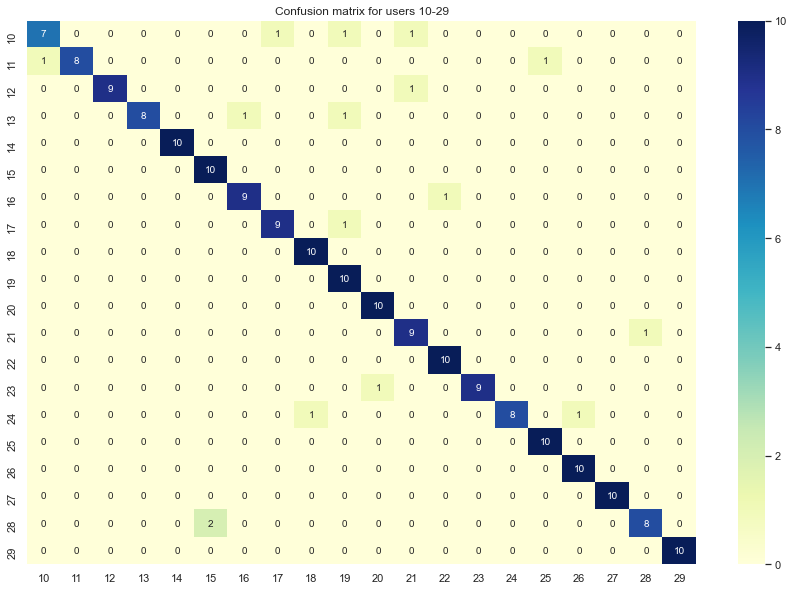

In [293]:
conf = confusion_matrix(test_tar,pred)
df_cm = pd.DataFrame(conf, index = [str(i) for i in range(10,30)],
                  columns = [str(i) for i in range(10,30)])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix for users 10-29')
plt.savefig('.\plots_and_graphs\confusion_matrix_10to29.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
import matplotlib
matplotlib.__version__

'3.2.1'

In [221]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'softmax')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model
model = get_compiled_model()
historty = model.fit(train_df2.values,train_tar.values,epochs=100)

Epoch 1/100
300/300 [==============================] - 1s 3ms/sample - loss: 5667.8361 - acc: 0.0533
Epoch 2/100
300/300 [==============================] - 0s 282us/sample - loss: 1959.4859 - acc: 0.1400
Epoch 3/100
300/300 [==============================] - 0s 282us/sample - loss: 834.5222 - acc: 0.1267
Epoch 4/100
300/300 [==============================] - 0s 334us/sample - loss: 502.4071 - acc: 0.1800
Epoch 5/100
300/300 [==============================] - 0s 282us/sample - loss: 826.7492 - acc: 0.2767
Epoch 6/100
300/300 [==============================] - 0s 282us/sample - loss: 345.0508 - acc: 0.3567
Epoch 7/100
300/300 [==============================] - 0s 334us/sample - loss: 389.2614 - acc: 0.3633
Epoch 8/100
300/300 [==============================] - 0s 282us/sample - loss: 345.9171 - acc: 0.3333
Epoch 9/100
300/300 [==============================] - 0s 282us/sample - loss: 11.4664 - acc: 0.4100
Epoch 10/100
300/300 [==============================] - 0s 282us/sample - loss: 73.

300/300 [==============================] - 0s 408us/sample - loss: 1.0203e-04 - acc: 1.0000
Epoch 81/100
300/300 [==============================] - 0s 230us/sample - loss: 9.9844e-05 - acc: 1.0000
Epoch 82/100
300/300 [==============================] - 0s 282us/sample - loss: 9.8282e-05 - acc: 1.0000
Epoch 83/100
300/300 [==============================] - 0s 260us/sample - loss: 9.6567e-05 - acc: 1.0000
Epoch 84/100
300/300 [==============================] - 0s 312us/sample - loss: 9.4762e-05 - acc: 1.0000
Epoch 85/100
300/300 [==============================] - 0s 334us/sample - loss: 9.3338e-05 - acc: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 312us/sample - loss: 9.1961e-05 - acc: 1.0000
Epoch 87/100
300/300 [==============================] - 0s 334us/sample - loss: 9.0052e-05 - acc: 1.0000
Epoch 88/100
300/300 [==============================] - 0s 334us/sample - loss: 8.8711e-05 - acc: 1.0000
Epoch 89/100
300/300 [==============================] - 0s 334us/sam

In [222]:
scores = model.evaluate(test_df2, test_tar)
print(scores)

200/200 [==============================] - 0s 2ms/sample - loss: 1618.2348 - acc: 0.9050
[1618.2347898739577, 0.905]


In [220]:
pred = model3.predict(test_df2)
pred = np.argmax(pred,axis = 1)
pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, 42,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3, 32,  3,  3,
        3, 36, 32, 36,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 45,
       34,  5,  5,  5, 45, 45, 34, 45,  5,  6,  6,  6,  6,  6,  6, 11,  6,
        6, 26,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8, 46,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  2, 10,
        2, 35,  2, 10, 10, 10, 10, 10, 11, 11, 11, 15, 11, 11, 11, 11,  6,
       11, 34, 12, 28, 12, 28, 28, 12, 12, 12, 12, 19, 13,  5, 13, 13, 12,
       13, 19, 13,  5, 14, 14, 14, 14, 14, 14, 14, 19, 14, 33, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16,  0, 16, 16, 16, 16,  0, 16,
       26, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19,  8, 19, 19, 32, 12, 19, 19, 32, 19], dtype=int64)

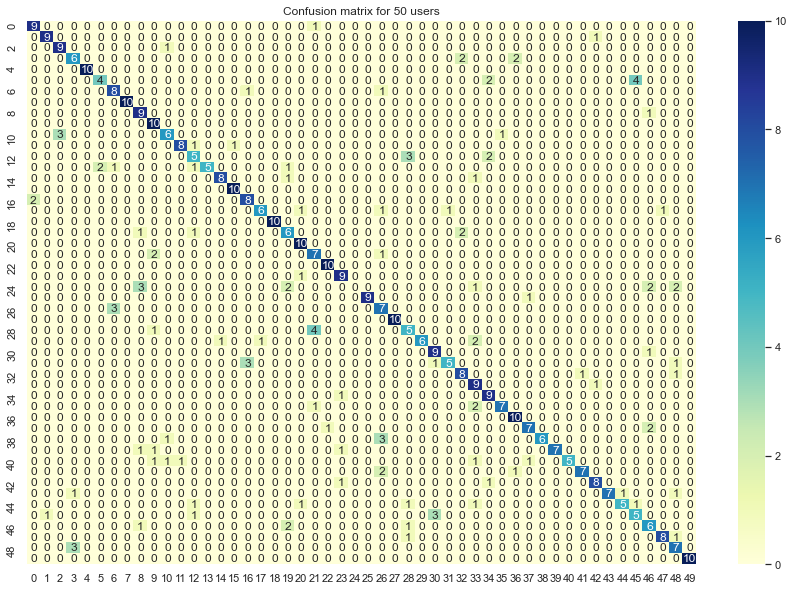

In [208]:
conf = confusion_matrix(test_tar,pred)
df_cm = pd.DataFrame(conf, index = [str(i) for i in range(50)],
                  columns = [str(i) for i in range(50)])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix for 50 users')
plt.savefig('.\plots_and_graphs\confusion_matrix_50_users.png', dpi=300, bbox_inches='tight')
plt.show()

# Fake and Genuine

In [10]:
fg_data = pd.read_pickle('clean_data_v2.pkl')
fg_data.head()

,FileName,user,sample,label,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0000f00.fpg,0,00,0,3005.0,1586.0,962.108911,1.894704,10,28,...,89.606514,35.060504,1023.0,126.00,62.00,96.805324,37.704918,219.12,126.00,62.00
1,0000f01.fpg,0,01,0,2538.0,1373.0,938.732673,1.848507,7,27,...,91.829454,23.172350,1023.0,107.00,64.00,100.000000,19.446468,837.87,106.01,63.01
2,0000f02.fpg,0,02,0,2005.0,1481.0,947.141593,1.353815,6,24,...,86.191531,5.276292,1023.0,105.00,64.00,92.817955,4.523970,1023.00,103.26,64.87
3,0000f03.fpg,0,03,0,2210.0,1434.0,899.801802,1.541144,9,22,...,63.901283,12.791157,1023.0,108.78,67.22,72.986425,17.015342,416.02,109.89,67.89
4,0000f04.fpg,0,04,0,2136.0,1469.0,900.307087,1.454050,13,39,...,69.078897,4.767368,1023.0,129.08,66.00,78.370787,9.870660,968.98,128.00,67.46


In [11]:
fg_data.columns
col_drop = ['FileName','dist_list','new_x','new_y','new_pressure','new_azi','new_pen_el']
fg_data.drop(col_drop,axis=1,inplace = True)
fg_data['sample'] = fg_data['sample'].apply(pd.to_numeric) 
f_data = fg_data.loc[fg_data['label']==0]
g_data = fg_data.loc[fg_data['label']==1]
print(f_data.shape,g_data.shape)

(2272, 515) (2496, 515)


In [13]:
fg_data.dtypes

user              int64
sample            int64
label             int64
x_len           float64
y_len           float64
avg_ps          float64
ratio           float64
dif_pen           int64
dif_az            int64
pen_up            int64
sign_time       float64
x_speed         float64
y_speed         float64
x_size            int64
total_length    float64
tx0             float64
ty0             float64
tp0             float64
ta0             float64
te0             float64
tx1             float64
ty1             float64
tp1             float64
ta1             float64
te1             float64
tx2             float64
ty2             float64
tp2             float64
ta2             float64
te2             float64
                 ...   
tx94            float64
ty94            float64
tp94            float64
ta94            float64
te94            float64
tx95            float64
ty95            float64
tp95            float64
ta95            float64
te95            float64
tx96            

In [8]:
f_data.user.value_counts().sort_index()

0     25
1     25
2     24
3     25
4     25
5     23
6     25
7     25
8     22
9     23
10    11
11    23
12    23
13    15
14    25
15    25
16    25
17    25
18    25
19    25
20    25
21    25
22    25
23    25
24    22
25    17
26    25
27    25
28    25
29    25
      ..
70    25
71    20
72    25
73    25
74    25
75    25
76    25
77    20
78    25
79    25
80    25
81    10
82    25
83    18
84    15
85    25
86    21
87    25
88    25
89    24
90    24
91    20
92    23
93    19
94    14
95    23
96    16
97    15
98    22
99    25
Name: user, Length: 100, dtype: int64

In [296]:
user_g1 = g_data.loc[g_data['user']==1] 
user_f1 = f_data.loc[f_data['user']==0]
train_user_g1 = user_g1.loc[user_g1['sample']<15]
test_user_g1 = user_g1.loc[user_g1['sample']>=15]


In [307]:
#target_train = train_user_g1.pop('label')
#target_test = test_user_g1.pop('label')
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'relu'),
    tf.keras.layers.Dense(2,activation = 'sigmoid')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
    return model
model = get_compiled_model()
historty = model.fit(train_user_g1.values,target_train.values,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 54ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 2ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 3ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 8/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 9/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 10/100
15/15 [==============================] - 0s 434us/sample - loss: 16.1181 - ac

Epoch 82/100
15/15 [==============================] - 0s 0s/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 83/100
15/15 [==============================] - 0s 0s/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 84/100
15/15 [==============================] - 0s 434us/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 85/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 86/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 87/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 88/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 89/100
15/15 [==============================] - 0s 1ms/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 90/100
15/15 [==============================] - 0s 0s/sample - loss: 16.1181 - acc: 0.0000e+00
Epoch 91/100
15/15 [==============================] - 0s 435us/sample - loss: 16.11

In [48]:
df2 = pd.read_pickle('clean_data_v2.pkl')
drop_col = ['FileName','new_x','new_y','new_pen_el','new_azi','new_pressure','dist_list']
df2.drop(drop_col,axis = 1,inplace = True)
df2.head()

,user,sample,label,x_len,y_len,avg_ps,ratio,dif_pen,dif_az,pen_up,...,tx98,ty98,tp98,ta98,te98,tx99,ty99,tp99,ta99,te99
0,0,00,0,3005.0,1586.0,962.108911,1.894704,10,28,0,...,89.606514,35.060504,1023.0,126.00,62.00,96.805324,37.704918,219.12,126.00,62.00
1,0,01,0,2538.0,1373.0,938.732673,1.848507,7,27,0,...,91.829454,23.172350,1023.0,107.00,64.00,100.000000,19.446468,837.87,106.01,63.01
2,0,02,0,2005.0,1481.0,947.141593,1.353815,6,24,0,...,86.191531,5.276292,1023.0,105.00,64.00,92.817955,4.523970,1023.00,103.26,64.87
3,0,03,0,2210.0,1434.0,899.801802,1.541144,9,22,0,...,63.901283,12.791157,1023.0,108.78,67.22,72.986425,17.015342,416.02,109.89,67.89
4,0,04,0,2136.0,1469.0,900.307087,1.454050,13,39,0,...,69.078897,4.767368,1023.0,129.08,66.00,78.370787,9.870660,968.98,128.00,67.46


In [83]:
df2 = df2.loc[df2['user']==3]
df2['sample'] = df2['sample'].apply(pd.to_numeric) 
train_df2 = df2.loc[df2['sample'] <15]
test_df2 = df2.loc[df2['sample'] >=15]
train_df2.shape

(0, 515)

In [84]:
train_target = train_df2.pop('label')
test_target = test_df2.pop('label')

In [101]:
def get_model():
    model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy'])
    return model
#model = get_model()
#historty = model.fit(train_df2.values,train_target.values,epochs=20)

In [53]:
import tensorflow as tf
from tensorflow import keras

In [58]:
model.evaluate(test_df2.values,test_target.values)

1/1 [==============================] - 0s 0s/step - loss: 0.0109 - accuracy: 1.0000


[0.010854341089725494, 1.0]

In [59]:
pred = model.predict(test_df2.values)

In [60]:
pred

array([[3.5829842e-03],
       [5.0800086e-11],
       [1.5117527e-10],
       [7.6202600e-09],
       [1.0673979e-11],
       [6.7768106e-13],
       [1.2145815e-10],
       [5.4113450e-11],
       [3.2732692e-11],
       [8.6833264e-13],
       [8.0839241e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9957520e-01],
       [1.0000000e+00],
       [9.9964333e-01],
       [9.9999845e-01],
       [9.9999368e-01]], dtype=float32)

In [61]:
test_target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [63]:
ans=[]
for i in pred:
    if i > 0.9:
        ans.append(1)
    else:
        ans.append(0)
ans

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [109]:
def verify(user):
    df2 = pd.read_pickle('clean_data_v2.pkl')
    drop_col = ['FileName','new_x','new_y','new_pen_el','new_azi','new_pressure','dist_list']
    df2.drop(drop_col,axis = 1,inplace = True)
    df2.head()
    df2 = df2.loc[df2['user']==user]
    df2['sample'] = df2['sample'].apply(pd.to_numeric) 
    train_df2 = df2.loc[df2['sample'] <15]
    test_df2 = df2.loc[df2['sample'] >=15]
    #train_df2.shape
    train_target = train_df2.pop('label')
    test_target = test_df2.pop('label')
    model = get_model()
    historty = model.fit(train_df2.values,train_target.values,epochs=10)
    #print(user,model.evaluate(test_df2.values,test_target.values))
    return model.evaluate(test_df2.values,test_target.values)

In [110]:
accuracy = []
for i in range(20):
    acc = verify(i)
    accuracy.append(acc[1])

Epoch 1/10
1/1 [==============================] - 0s 0s/step - loss: 271.8234 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 0s/step - loss: 83.2945 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 11.9510 - accuracy: 0.5333
Epoch 4/10
1/1 [==============================] - 0s 0s/step - loss: 0.8588 - accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 1.9265 - accuracy: 0.7000
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 4.4676 - accuracy: 0.5667
Epoch 7/10
1/1 [==============================] - 0s 0s/step - loss: 4.5403 - accuracy: 0.5667
Epoch 8/10
1/1 [==============================] - 0s 0s/step - loss: 2.7284 - accuracy: 0.6333
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 0.5055 - accuracy: 0.8667
Epoch 10/10
1/1 [==============================] - 0s 0s/step - loss: 0.5661 - accuracy: 0.8500
Epoch 1/10
1/1 [===========================

1/1 [==============================] - 0s 0s/step - loss: 3583.6255 - accuracy: 0.5000
Epoch 1/10
1/1 [==============================] - 0s 0s/step - loss: 1409.7634 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 731.2971 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 122.4099 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 0s/step - loss: 5.1824 - accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 3.4143 - accuracy: 0.7000
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 2.0119 - accuracy: 0.7333
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.9770 - accuracy: 0.8667
Epoch 8/10
1/1 [==============================] - 0s 0s/step - loss: 0.3781 - accuracy: 0.9000
Epoch 9/10
1/1 [==============================] - 0s 0s/step - loss: 0.0288 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================

In [111]:
accuracy

[0.8500000238418579,
 1.0,
 0.550000011920929,
 0.6499999761581421,
 0.699999988079071,
 0.8999999761581421,
 0.8500000238418579,
 0.5,
 0.5882353186607361,
 0.800000011920929,
 0.5333333611488342,
 0.699999988079071,
 0.800000011920929,
 0.625,
 0.949999988079071,
 0.8500000238418579,
 1.0,
 0.699999988079071,
 1.0,
 0.550000011920929]

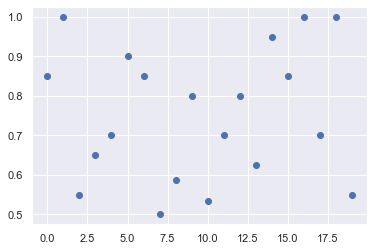

In [113]:
plt.plot(accuracy,'o')
plt.show()